In [57]:
from google.colab import drive
from sklearn import metrics
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [58]:
print(os.listdir("/content/gdrive/MyDrive/project"))

['test.xlsx', 'train.xlsx']


In [59]:
train = pd.read_excel('/content/gdrive/MyDrive/project/train.xlsx')
test = pd.read_excel('/content/gdrive/MyDrive/project/test.xlsx')

In [60]:
print("train data shape: ",train.shape)
print("Test data shape: ",test.shape)

train data shape:  (791778, 5)
Test data shape:  (73546, 5)


In [61]:
train.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500


In [62]:
train.isnull().sum()

Product_Code           0
Warehouse              0
Product_Category       0
Date                8740
Order_Demand           0
dtype: int64

In [63]:
all_data = train.append(test,sort = False)
all_data.shape

(865324, 10)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


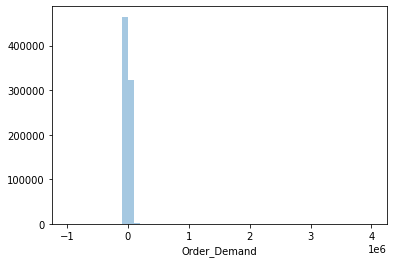

In [64]:
sns.distplot(train['Order_Demand'],kde = False)
plt.show()

In [65]:
all_data.tail()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Product_1153,Whse_J,Category_006,2016-06-28 00:00:00,50000
73541,NaN,NaN,NaN,NaT,NaN,Product_1287,Whse_J,Category_019,2016-02-02,2000.0
73542,NaN,NaN,NaN,NaT,NaN,Product_1295,Whse_J,Category_019,2016-02-02,2000.0
73543,NaN,NaN,NaN,NaT,NaN,Product_1378,Whse_J,Category_019,2016-02-04,1000.0
73544,NaN,NaN,NaN,NaT,NaN,Product_1295,Whse_J,Category_019,2016-02-09,200.0
73545,NaN,NaN,NaN,NaT,NaN,Product_1294,Whse_J,Category_019,2016-02-22,100.0


In [66]:
all_data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Product_1153,Whse_J,Category_006,2016-06-28 00:00:00,50000
0,Product_0993,Whse_J,Category_028,2012-07-27,100.0,NaN,NaN,NaN,NaT,NaN
1,Product_0979,Whse_J,Category_028,2012-01-19,500.0,NaN,NaN,NaN,NaT,NaN
2,Product_0979,Whse_J,Category_028,2012-02-03,500.0,NaN,NaN,NaN,NaT,NaN
3,Product_0979,Whse_J,Category_028,2012-02-09,500.0,NaN,NaN,NaN,NaT,NaN
4,Product_0979,Whse_J,Category_028,2012-03-02,500.0,NaN,NaN,NaN,NaT,NaN


In [115]:
all_data['date'] = pd.to_datetime(all_data['date'])
all_data.dtypes

KeyError: ignored

In [67]:
demand = all_data['Order_Demand']
all_data = all_data.drop('Order_Demand',axis=1)
all_data['Order_Demand'] = demand

In [68]:
all_data = all_data.drop('Date',axis=1)
all_columns = list(all_data.columns)

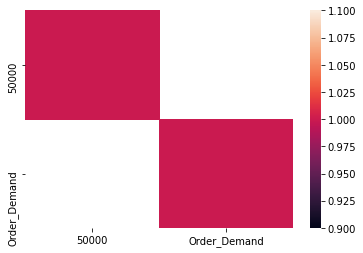

In [69]:
corr = all_data[all_columns].corr()
sns.heatmap(corr)

In [71]:
print (corr['Order_Demand'].sort_values(ascending=False), '\n') 


Order_Demand    1.0
50000           NaN
Name: Order_Demand, dtype: float64 



In [108]:
all_columns = ['Product_Code','warehouse','Product_Category','Date']

selected_columns = ['Product_Code','Product_Category']

train_new = all_data[all_data['Order_Demand'].notnull()]
test_new = all_data[all_data['Order_Demand'].isnull()]


X = train_new[selected_columns]
y = train_new['Order_Demand']


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [110]:
model1 = LinearRegression()
model1.fit(X_train,y_train)
predict1 = model1.predict(X_test)

ValueError: ignored

In [99]:
model1.coef_

array([1.])

In [101]:
model1.intercept_

-9.094947017729282e-13

In [102]:
print('linear regression value:')
model1.score(X_train, y_train)

linear regression value:


1.0

In [100]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')